### Santoshi Bhujel, Student ID: 21293302

### Load the dataset

In [1]:
import pandas as pd

dataset = pd.read_csv("income.csv")

print("dataset length:", len(dataset))
dataset.head()

dataset length: 26215


,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40


In [2]:
print(dataset["income"].value_counts(), "\n")

0    18374
1     7841
Name: income, dtype: int64 



In [3]:
dataset.dtypes

income             int64
age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
dtype: object

In [4]:
dataset.duplicated().any()

True

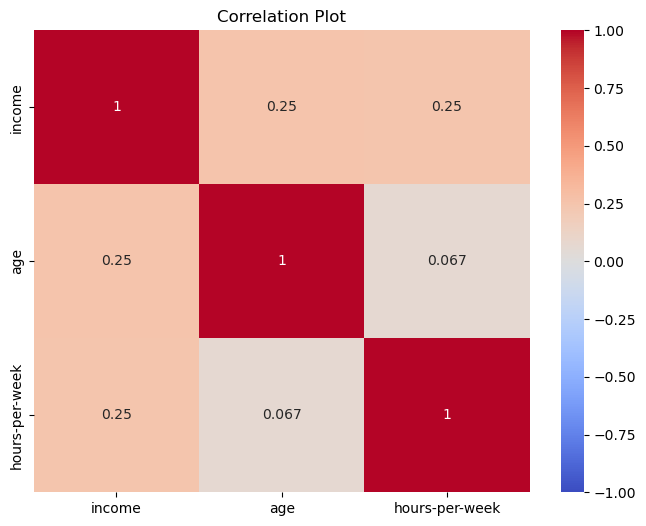

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()

### Preprocess the dataset

In [6]:
#Check missing value
dataset.isna().sum()

income               0
age                  0
workclass         1396
education            0
marital-status       0
occupation        1401
relationship         0
race                 0
sex                  0
hours-per-week       0
dtype: int64

In [7]:
#Drop the rows which has missing values
dataset = dataset.dropna()
print("dataset length:", len(dataset))

dataset length: 24814


##### Check if there is any duplicated rows in the dataset

In [8]:
dataset.duplicated().any()

True

In [9]:
dataset = dataset.drop_duplicates()

In [10]:
print(dataset.duplicated().any())
print(dataset.isna().sum())
print(dataset.shape)

False
income            0
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
dtype: int64
(21537, 10)


In [11]:
cols = ['age', 'hours-per-week']
dataset[cols] = dataset[cols].astype(float)

##### check value count for the categorical variables

In [12]:
print(dataset["workclass"].value_counts(), "\n")
print(dataset["income"].value_counts(), "\n")
print(dataset.dtypes)
# print(dataset["education"].value_counts(),"\n")
# print(dataset["marital-status"].value_counts(),"\n")
# print(dataset["occupation"].value_counts(),"\n")
# print(dataset["race"].value_counts(),"\n")

Private             15108
Self-emp-not-inc     1999
Local-gov            1656
State-gov            1021
Self-emp-inc          951
Federal-gov           793
Without-pay             9
Name: workclass, dtype: int64 

0    15100
1     6437
Name: income, dtype: int64 

income              int64
age               float64
workclass          object
education          object
marital-status     object
occupation         object
relationship       object
race               object
sex                object
hours-per-week    float64
dtype: object


##### Deal with categorical variables

In [13]:
dataset['sex'] = dataset['sex'].replace({'Male': 0, 'Female': 1})
# note Fasting Blood Sugar is a boolean variable with True and False
dataset['education'] = dataset['education'].replace({
        'Preschool': 1,
        '1st-4th': 2,
        '5th-6th': 3,
        '7th-8th': 4,
        '9th': 5,
        '10th': 6,
        '11th': 7,
        '12th': 8,
        'HS-grad': 9,
        'Some-college': 10,
        'Assoc-voc': 11,
        'Assoc-acdm': 12,
        'Bachelors': 13,
        'Masters': 14,
        'Prof-school': 15,
        'Doctorate': 16
    })

dataset.drop(['relationship'], axis = 1, inplace = True)
dataset.head()

,income,age,workclass,education,marital-status,occupation,race,sex,hours-per-week
0,0,39.0,State-gov,13,NotMarried,Adm-clerical,White,0,40.0
1,0,50.0,Self-emp-not-inc,13,Married,Exec-managerial,White,0,13.0
2,0,38.0,Private,9,Separated,Handlers-cleaners,White,0,40.0
3,0,53.0,Private,7,Married,Handlers-cleaners,Black,0,40.0
4,0,28.0,Private,13,Married,Prof-specialty,Black,1,40.0


In [14]:
dataset = pd.get_dummies(dataset, columns=['workclass','marital-status', 'occupation', 'race'])
dataset.head()


,income,age,education,sex,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,39.0,13,0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,50.0,13,0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,38.0,9,0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,53.0,7,0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,28.0,13,1,40.0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


##### Check dataset shape

In [15]:
# corr_matrix = dataset.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Plot')
# plt.show()

In [16]:
print(dataset.dtypes)
print(dataset.shape)

income                            int64
age                             float64
education                         int64
sex                               int64
hours-per-week                  float64
workclass_Federal-gov             uint8
workclass_Local-gov               uint8
workclass_Private                 uint8
workclass_Self-emp-inc            uint8
workclass_Self-emp-not-inc        uint8
workclass_State-gov               uint8
workclass_Without-pay             uint8
marital-status_Married            uint8
marital-status_NotMarried         uint8
marital-status_Separated          uint8
marital-status_Widowed            uint8
occupation_Adm-clerical           uint8
occupation_Armed-Forces           uint8
occupation_Craft-repair           uint8
occupation_Exec-managerial        uint8
occupation_Farming-fishing        uint8
occupation_Handlers-cleaners      uint8
occupation_Machine-op-inspct      uint8
occupation_Other-service          uint8
occupation_Priv-house-serv        uint8


##### Define the input variables and the target variable


In [17]:
array = dataset.values
X = array[:,1:]
y = array[:,0]

### Split the dataset and normalize data

##### Split the training and testing dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (19383, 34)
X_test shape: (2154, 34)
y_train shape: (19383,)
y_test shape: (2154,)


##### Apply normalization on both train and testing dataset

In [19]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)


### Logistic regression and SVM

LR

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_norm, y_train)
test_score = log_model.score(X_test_norm, y_test)
lr_y_pred = log_model.predict(X_test_norm)
lr_model_precision = precision_score(y_test, lr_y_pred)
print(confusion_matrix(y_test, lr_y_pred))
print("Testing Accuracy of LR:", test_score)
print("Testing Precision of LR:", lr_model_precision)

[[1287  200]
 [ 279  388]]
Testing Accuracy of LR: 0.7776230269266481
Testing Precision of LR: 0.6598639455782312


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [22]:
svm_model = SVC()
svm_model.fit(X_train_norm, y_train)
test_score = svm_model.score(X_test_norm, y_test)
svm_y_pred = svm_model.predict(X_test_norm)
svm_model_precision = precision_score(y_test, svm_y_pred)
print("Testing Accuracy of SVC:", test_score)
print("Testing Precision of SVC:", svm_model_precision)
print(confusion_matrix(y_test, svm_y_pred))

Testing Accuracy of SVC: 0.7924791086350975
Testing Precision of SVC: 0.6936619718309859
[[1313  174]
 [ 273  394]]


### Train a model with 10-fold cross valiation

##### 10 fold cross validation

In [23]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=2)

##### Run the 10-fold cross validation

In [24]:
from sklearn.model_selection import cross_val_score

lr_results = cross_val_score(log_model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of LR:",lr_results.mean())

svm_results = cross_val_score(svm_model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of SVM:",svm_results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Accuracy of LR: 0.8065303947913955
Average Accuracy of SVM: 0.8008038784580904


In [25]:
print(lr_results)
print(svm_results)

[0.81382156 0.82310469 0.80402269 0.78998968 0.79308566 0.80701754
 0.81785346 0.80650155 0.79618163 0.81372549]
[0.80711707 0.81021145 0.80350696 0.7868937  0.78844169 0.81372549
 0.80804954 0.79618163 0.79102167 0.80288958]


### Optimize the Logistic Regression models with cross validation

In [26]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

grid_params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear','saga'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(max_iter=250)
gs_lr_result = GridSearchCV(lr, grid_params_lr, cv=kfold).fit(X_train_norm, y_train)
print("GridSearchCV Best Score:", gs_lr_result.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV Best Score: 0.8068399923146155


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Evaluate the trained Logistic Regression model using testing dataset

In [27]:
test_accuracy = gs_lr_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.7776230269266481


check the parameter setting for the best selected model

In [28]:
gs_lr_result.best_params_

{'C': 1.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

### Optimize the SVM model

In [29]:
from sklearn.model_selection import GridSearchCV

grid_params_svc = {
    'kernel': ['linear', 'poly'],
    'C': [0.01, 0.1, 1, 5, 10],
    'degree': [3,5,8],
    'gamma': ['auto','scale'],
    'class_weight' : [None, 'balanced']
}

svc = SVC()
gs_svc_result = GridSearchCV(svc, grid_params_svc, cv=kfold).fit(X_train_norm, y_train)
print(gs_svc_result.best_score_)

0.8083362206748556


Evaluate the trained svm model using testing dataset

In [30]:
test_accuracy = gs_svc_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.7952646239554317


check the parameter setting for the best selected model

In [31]:
gs_svc_result.best_params_

{'C': 5, 'class_weight': None, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

### K-means Model



In [20]:
from sklearn.cluster import KMeans
norm = MinMaxScaler().fit(X_train)
X = norm.transform(X_train)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
import numpy as np

kmeans_labels = kmeans.labels_
unique_labels, unique_counts = np.unique(kmeans_labels, return_counts=True)
dict(zip(unique_labels, unique_counts))

{0: 9270, 1: 10113}

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

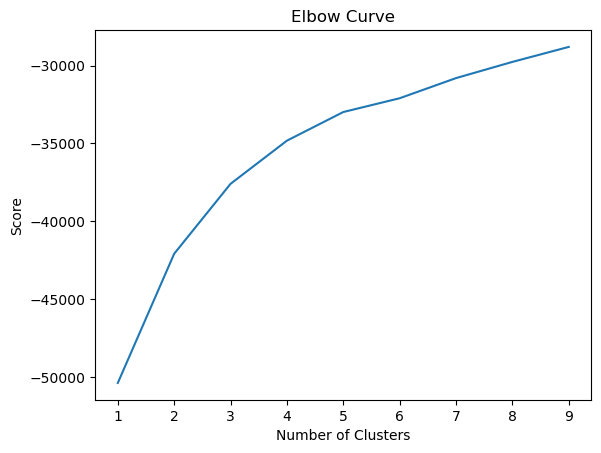

In [37]:
import matplotlib.pyplot as plt

num_cluster = range(1, 10)
kmeans_list = [KMeans(n_clusters=i) for i in num_cluster]
kmeans_list
scores = [kmeans_list[i].fit(X).score(X) for i in range(len(kmeans_list))]
scores
plt.plot(num_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

kmeans_cluster_centers = kmeans.cluster_centers_
closest = pairwise_distances_argmin(kmeans.cluster_centers_, X)

selected_rows = dataset.iloc[closest, :]
selected_rows_transposed = selected_rows.T

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Display the transposed DataFrame
print(selected_rows_transposed)

                              11540  6945 
income                          0.0    0.0
age                            28.0   56.0
education                       9.0   10.0
sex                             1.0    0.0
hours-per-week                 32.0   45.0
workclass_Federal-gov           0.0    0.0
workclass_Local-gov             0.0    0.0
workclass_Private               1.0    1.0
workclass_Self-emp-inc          0.0    0.0
workclass_Self-emp-not-inc      0.0    0.0
workclass_State-gov             0.0    0.0
workclass_Without-pay           0.0    0.0
marital-status_Married          0.0    1.0
marital-status_NotMarried       1.0    0.0
marital-status_Separated        0.0    0.0
marital-status_Widowed          0.0    0.0
occupation_Adm-clerical         0.0    0.0
occupation_Armed-Forces         0.0    0.0
occupation_Craft-repair         0.0    1.0
occupation_Exec-managerial      0.0    0.0
occupation_Farming-fishing      0.0    0.0
occupation_Handlers-cleaners    0.0    0.0
occupation_

Accuracy of Clustering Model

In [23]:
from sklearn.metrics import accuracy_score

kmeans_labels = kmeans.labels_
# or kmeans_lables = kmeans.predict(X)

accuracy = accuracy_score(y_train, kmeans_labels)
print("k means prediction accuracy:", accuracy)

k means prediction accuracy: 0.28096785843264716


In [24]:
test_kmeans_lables = kmeans.predict(X_test)

accuracy = accuracy_score(y_test, test_kmeans_lables)
print("k means test accuracy:", accuracy)

k means test accuracy: 0.6903435468895079
